In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

## $m_2a = - \frac{Gm_1m_2}{r^2}$ 
## We can rewrite this as:
## * $\dot{x} = \frac{dx}{dt} = v_x$
## * $\ddot{x} = \frac{d^2x}{dt^2} = \frac{dv_x}{dt} = -\frac{GM_E}{r^{3/2}}x$

In General

## * $\vec{\dot{u}} = \vec{v}$
## * $\vec{\ddot{u}} = -\frac{GM_E}{r^{3/2}}\vec{u}$


## Complete the function below where we will treat state as a vector containing 6 elements:

## $$state = [x,y,z,v_x,v_y,v_z]$$

In [2]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
   
    r = np.sqrt(x**2+y**2+z**2)
    
    x_ddot = -(mu*x)/(r**3)
    y_ddot = -(mu*y)/(r**3)
    z_ddot = -(mu*z)/(r**3)
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

## We will look at the orbit of the Internation Space Station. The initial conditons are defined below

In [3]:
# Initial Conditions / ISS
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667

 ### 1. Create an crete an initial state vector called $\it{\mathrm{state\_0}}$ array containing the initial position and veolcity information.
 ### 2. Then define a time array using $\it{\mathrm{linspace}}$ that starts at 0s and covers 21,600s containing 2000 points 
 ### 3. Use Scipy's $\it{\mathrm{integrate.solve\_ivp}}$ to solve the ODEs

In [4]:
initial_state = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]
t0=0
tf =21600
t_s= np.linspace(t0, tf, tf)
ans = integrate.solve_ivp(model_2BP, (t_s[0], t_s[-1]), initial_state, method='RK45', t_eval=t_s)
print(ans)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 230
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.00004630e+00, 2.00009260e+00, ...,
       2.15979999e+04, 2.15990000e+04, 2.16000000e+04])
 t_events: None
        y: array([[-2.77503475e+03, -2.77867493e+03, -2.78231154e+03, ...,
         3.10958371e+03,  3.10759128e+03,  3.10559051e+03],
       [ 4.52424941e+03,  4.51858116e+03,  4.51290710e+03, ...,
         2.49549031e+03,  2.50310276e+03,  2.51070841e+03],
       [ 4.20743331e+03,  4.21111028e+03,  4.21478184e+03, ...,
        -3.51356682e+03, -3.50985308e+03, -3.50612992e+03],
       [-3.64179309e+00, -3.63822794e+00, -3.63465811e+00, ...,
        -1.98832865e+00, -1.99659148e+00, -2.00484843e+00],
       [-5.66508860e+00, -5.67089356e+00, -5.67669124e+00, ...,
         7.61520781e+00,  7.60856341e+00,  7.60189998e+00],
       [ 3.67950067e+00,  3.67409647e+00,  3.66868754e+00,

# Analyze the Results

Make plots of X vs. time
1. X vs. time, Y vs, time, Z vs. time
2. X vs. Y, X vs. Z, Y vs. Z


<IPython.core.display.Javascript object>


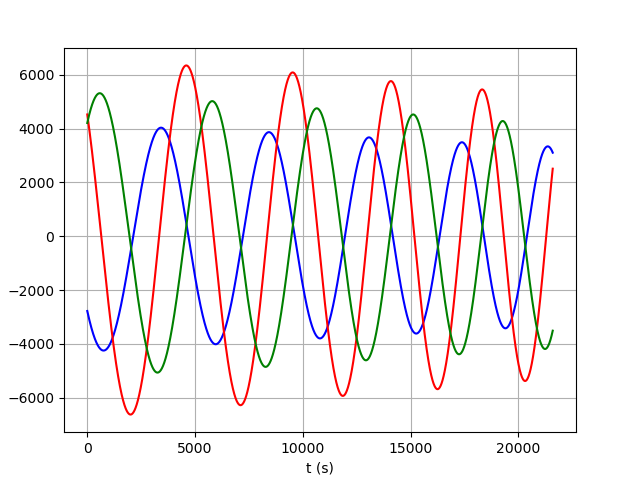

In [7]:
fig = plt.figure('Integrator')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(ans.t, ans.y[0],'b', label=r'$x(t)$')
ax.plot(ans.t, ans.y[1],'r',)
ax.plot(ans.t, ans.y[2],'g',)
ax.set_xlabel('t (s)')
ax.grid()

# 3D Plot

Make a 3D plot showing the 3D trajectory of the ISS


<IPython.core.display.Javascript object>


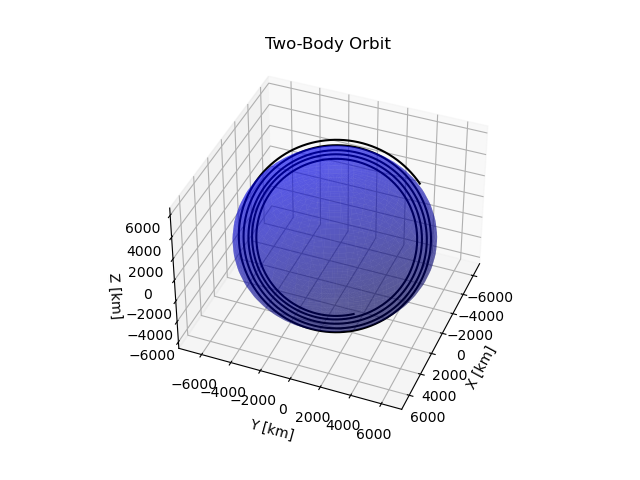

In [9]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(ans.y[0], ans.y[1], ans.y[2], 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');
